In [0]:
import tensorflow

In [0]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [0]:
import keras 

In [0]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


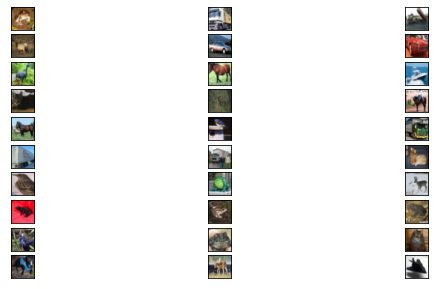

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
figt=plt.figure(figsize=(10,5))
for i in range(30):
        ax=figt.add_subplot(10,3,i+1,xticks=[],yticks=[])
        ax.imshow(np.squeeze(x_train[i]))

In [0]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [0]:
from keras.utils import np_utils
num_classes=len(np.unique(y_train))
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

(x_train,x_valid)=x_train[5000:],x_train[:5000]

(y_train,y_valid)=y_train[5000:],y_train[:5000]

print('x_train shape:',x_train.shape)

print(x_train.shape[0],'train samples')
print(x_test.shape[0],'test samples')
print(x_valid.shape[0],'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)
x_train.shape

(45000, 32, 32, 3)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0.2))

model.add(Convolution2D(2*32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(2*32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0.2))

model.add(Convolution2D(4*32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(4*32, (3, 3), activation='relu',padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='elu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)       

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='Convolutional.hdf5',verbose=1,save_best_only=True)
hist=model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),epochs=50,validation_data=(x_valid,y_valid),callbacks=[checkpointer],verbose=1)

Epoch 1/50
1407/1407 [==============================] - 42s 30ms/step - loss: 1.6599 - accuracy: 0.4380 - val_loss: 1.6192 - val_accuracy: 0.4846

Epoch 00001: val_loss improved from inf to 1.61919, saving model to Convolutional.hdf5
Epoch 2/50
1407/1407 [==============================] - 33s 24ms/step - loss: 1.1287 - accuracy: 0.6035 - val_loss: 0.9571 - val_accuracy: 0.6640

Epoch 00002: val_loss improved from 1.61919 to 0.95714, saving model to Convolutional.hdf5
Epoch 3/50
1407/1407 [==============================] - 33s 24ms/step - loss: 0.9752 - accuracy: 0.6573 - val_loss: 0.9076 - val_accuracy: 0.6850

Epoch 00003: val_loss improved from 0.95714 to 0.90762, saving model to Convolutional.hdf5
Epoch 4/50
1407/1407 [==============================] - 33s 24ms/step - loss: 0.8758 - accuracy: 0.6957 - val_loss: 0.8588 - val_accuracy: 0.7074

Epoch 00004: val_loss improved from 0.90762 to 0.85883, saving model to Convolutional.hdf5
Epoch 5/50
1407/1407 [==============================

In [0]:
model.load_weights('Convolutional.hdf5')                  #using load_weights function 
score=model.evaluate(x_test,y_test,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)                 #returns the accuracy of the model 

10000/10000 [==============================] - 2s 152us/step
Test accuracy is 88.1900%


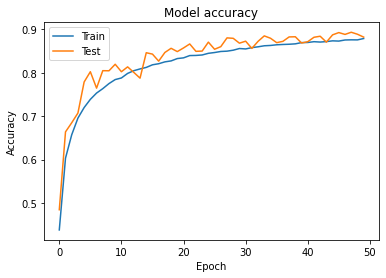

In [0]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.load_weights('Convolutional.hdf5')                  #using load_weights function 
score=model.evaluate(x_test,y_test,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)                 #returns the accuracy of the model 

10000/10000 [==============================] - 1s 146us/step
Test accuracy is 88.1900%
